In [1]:
#!pip install datasets
#! pip install umap-learn


In [2]:
datasets_dir=r"/home/dohye/workspace/venv/lib/python3.8/site-packages/datasets"
umap_dir=r"/home/dohye/workspace/venv/lib/python3.8/site-packages/umap"

import sys
sys.path.append(datasets_dir)


In [3]:
from datasets import list_datasets, load_dataset

In [4]:
all_datasets = list_datasets()
print(all_datasets[:10])

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [5]:
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
rgenerator_data = load_dataset("csv", data_files="../data/val.txt", sep='\t', names=['keyword', 'label'])

Using custom data configuration default-fb700a95bb8904bf
Found cached dataset csv (/home/dohye/.cache/huggingface/datasets/csv/default-fb700a95bb8904bf/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
rgenerator_data

DatasetDict({
    train: Dataset({
        features: ['keyword', 'label'],
        num_rows: 19556
    })
})

In [8]:
rgenerator_data["train"]["keyword"][:5]

['keyword',
 '지원동기|한국 의 재정 지출 승수|재정 지출 의 역|재정 지출 의 방향',
 '지원동기|고객 중심 의 인재|서울 보증 의 인재|최고 의 경쟁력',
 '지원동기|개인 회생 누락 건수|개인 회생 제도|회생 제도',
 '지원동기|동아리 위기 의 상황|동아리 원|동아리']

In [9]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [10]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [11]:
len(train_ds)

16000

In [12]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [13]:
train_ds.column_names

['text', 'label']

In [14]:
type(train_ds)

datasets.arrow_dataset.Dataset

In [15]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [16]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [17]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

### 2.1.2 데이터셋에서 데이터프레임으로

In [18]:
import pandas as pd

emotions.set_format(type="pandas")

In [19]:
type(emotions)

datasets.dataset_dict.DatasetDict

In [20]:
df = emotions["train"][:]

In [21]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [22]:
emotions["train"].features["label"]  # ClassLabel 객체

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [23]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [24]:
df["label_name"] = df["label"].apply(label_int2str)

In [25]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### 2.1.3 클래스 분포 살펴보기

In [26]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

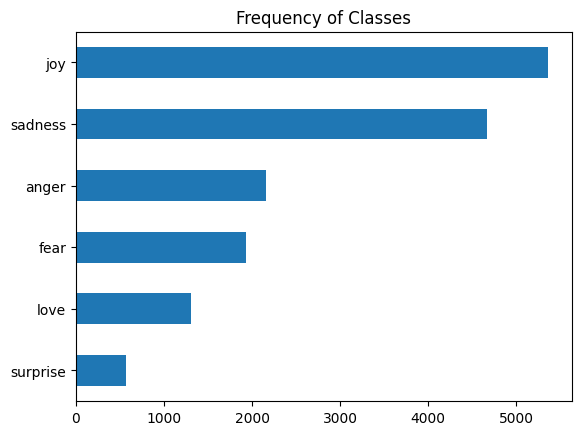

In [27]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

### 2.1.4 트윗 길이 확인

In [28]:
df["Words Per Tweet"] = df["text"].str.split().apply(len) # 단어 수 확인

###### 각 감정의 트윗 길이는 15개 단어 정도
###### 가장 긴 트윗도 512보다 작다.

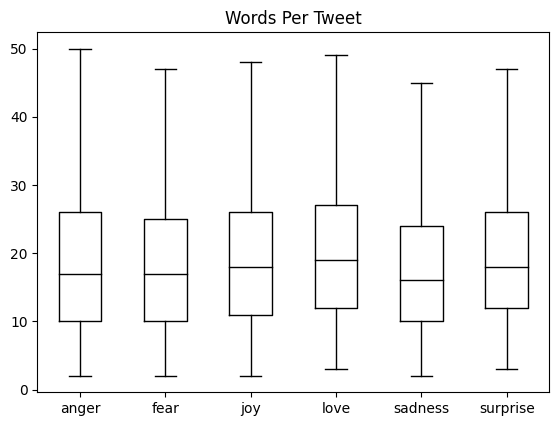

In [29]:
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [30]:
emotions.reset_format()

In [31]:
type(emotions)

datasets.dataset_dict.DatasetDict

#### 2.2 텍스트에서 토큰으로

##### 2.2.1 문자 토큰화

In [32]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)

tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [33]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [34]:
input_ids = [token2idx[token] for token in tokenized_text]

In [35]:
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [36]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0, 1, 2]}
)

categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [37]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [38]:
import torch
import torch.nn.functional as F

In [39]:
input_ids = torch.tensor(input_ids)  # tensor로 변경

In [40]:
len(token2idx)

20

In [41]:
len(tokenized_text)

38

In [42]:
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape  # torch.Size([38, 20]) # 20개의 token

torch.Size([38, 20])

In [43]:
print(tokenized_text[0])
print(input_ids[0])
print(one_hot_encodings[0])

T
tensor(5)
tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


##### 2.2.2 단어 토큰화

In [44]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

##### 2.2.3 부분단어 토큰화

In [45]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [46]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)  # 위와 동일

In [47]:
encoded_text = tokenizer(text)

In [48]:
encoded_text  # 101: CLS, 102: SEP

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [49]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [50]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [51]:
tokenizer.vocab_size

30522

In [52]:
tokenizer.model_max_length

512

In [53]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

##### 2.2.4 전체 데이터셋 토큰화하기

In [54]:
type(emotions)

datasets.dataset_dict.DatasetDict

In [55]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [56]:
emotions["train"][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [57]:
tokenize(emotions["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [58]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)  # batch_size=None, 전체 데이터셋이 하나의 배치로 tokenize() 함수에 적용

Loading cached processed dataset at /home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-6316da5de5436960.arrow
Loading cached processed dataset at /home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-2cb11f4abdb48d91.arrow
Loading cached processed dataset at /home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-1983a40220248de7.arrow


In [59]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [60]:
emotions_encoded["train"]["input_ids"][0]

[101,
 1045,
 2134,
 2102,
 2514,
 26608,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [61]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

#### 2.3 텍스트 분류 모델 훈련하기

##### 특성 추출
- 사전 훈련된 모델을 수정하지 않고 은닉 상태를 특성(feature)으로 사용해 분류 모델을 훈련

##### 미세 튜닝
- 사전 훈련된 모델의 파라미터도 업데이트하기 위해 전체 모델을 엔드-투-엔드로 훈련

##### 2.3.1 트랜스포머를 특성 추출기로 사용하기

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [63]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


- AutoModel 클래스는 토큰 인코딩을 임베딩으로 변환한 다음 인코더 스택에 통과시켜 은닉 상태를 반환한다.

In [64]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")

inputs['input_ids'].size()  # torch.Size([1, 6]) # batch_size, n_tokens

torch.Size([1, 6])

In [65]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [66]:
inputs = {k:v.to(device) for k, v in inputs.items()}

In [67]:
with torch.no_grad():
    outputs = model(**inputs)  # 마지막 은닉 상태 추출 (BaseModelOutput(last_hidden_state)..)
    
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [68]:
outputs.last_hidden_state.size()  # batch_size, n_tokens, hidden_dim

torch.Size([1, 6, 768])

In [69]:
outputs.last_hidden_state[:,0].size()  # [CLS] 토큰(시퀀스 시작에 등장) 의 마지막 은닉 상태를 얻었다.

torch.Size([1, 768])

In [70]:
def extract_hidden_states(batch):
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        outputs = model(**inputs)
        
    last_hidden_state = outputs.last_hidden_state
    
    # [CLS] 토큰에 대한 벡터를 반환 (BERT의 CLS 토큰은 분류 작업에서 전체 시퀀스의 정보가 담긴 특수한 토큰이다)
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()} # map() 메서드에 배치 입력을 사용하려면 파이썬이나 넘파이 객체를 반환하는 처리 함수가 필요
    

In [71]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [72]:
# tensor로 변환한다. 왜냐하면 현재 model은 입력으로 텐서가 입력되기를 기대한다.
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [73]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)  # extract hidden states all at once. Default batch_size=1000

Loading cached processed dataset at /home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-ea99ca6b6c99908d.arrow
Loading cached processed dataset at /home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-214d547a3fd063ec.arrow
Loading cached processed dataset at /home/dohye/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd/cache-8d19a3f5995ff53d.arrow


In [74]:
emotions_hidden.column_names  # hidden_state added

{'train': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
 'validation': ['text',
  'label',
  'input_ids',
  'attention_mask',
  'hidden_state'],
 'test': ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']}

- 특성 행렬 만들기

In [75]:
print(emotions_hidden["train"]["text"][:2])
print(emotions_hidden["train"]["label"][:2])
print(emotions_hidden["train"]["input_ids"][:2])
print(emotions_hidden["train"]["attention_mask"][:2])
print(emotions_hidden["train"]["hidden_state"][:2])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']
tensor([0, 0])
tensor([[  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  1045,  2064,  2175,  2013,  3110,  2061, 20625,  2000,  2061,
          9636, 17772,  2074,  2013,  2108,  2105,  2619,  2040, 14977,  19

In [85]:
# 은닉 상태를 입력 특성으로 사용하고, 레이블을 타겟으로 설정

import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])

Y_train = np.array(emotions_hidden["train"]['label'])
Y_valid = np.array(emotions_hidden["validation"]["label"])

In [77]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

- 훈련 세트 시각화하기

In [78]:
# UMAP 알고리즘 사용. UMAP은 특성이 [0,1] 범위에 놓일 때 잘 동작한다.
from umap import UMAP

# scikit-learn의 MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

In [80]:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])  # 특성을 X, Y 두 개로 

In [81]:
Y_train

array([0, 0, 3, ..., 1, 3, 0])

In [82]:
df_emb["label"] = Y_train

df_emb.head()

,X,Y,label
0,4.437095,6.303465,0
1,-2.908115,5.615671,0
2,5.343336,2.866310,3
3,-2.645395,3.121855,2
4,-3.131696,3.704905,3


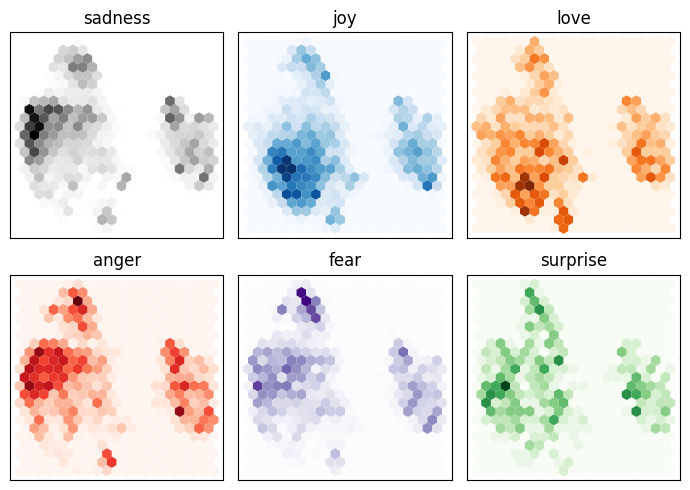

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()

cmaps=["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

- 간단한 분류 모델 훈련하기

In [86]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_valid, Y_valid)

0.6335

- 오차 행렬 만들기

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [92]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

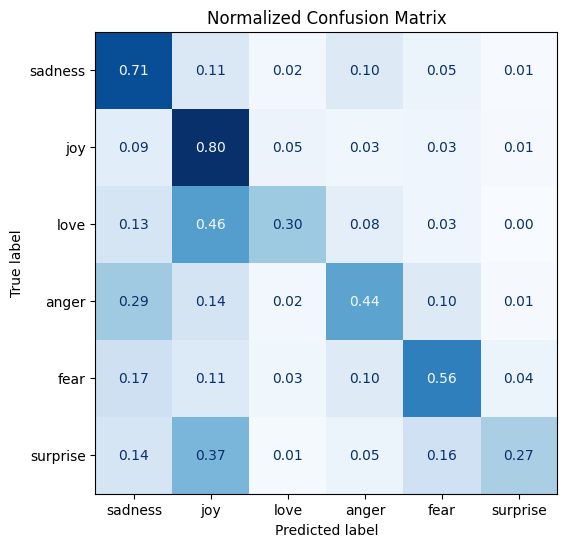

In [93]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, Y_valid, labels)

#### 2.3.2 트랜스포머 미세 튜닝하기

- 사전 훈련된 모델 로드하기

In [94]:
from transformers import AutoModelForSequenceClassification  # 사전 훈련된 모델 출력 위에 베이스 모델(pretrained_model)과 함께 훈련할 수 있는 분류 헤드가 있다는 점에서 AutoModel 클래스를 로드할 떄와 다르다.

num_labels = 6
model = (
    AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)  # 분류 헤드가 아직 훈련되지 않았기 때문에 오류 메시지는 정상
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

- 성공 지표 정의하기

In [95]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred): #EvalPrediction 객체를 입력으로
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1 score": f1
    }

- 모델 훈련하기

In [97]:
from transformers import Trainer, TrainingArguments

batch_size=64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"../output/{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=False,
    save_strategy="epoch", # 기본 step, 훈련이 끝난 후 최상의 모델을 자동으로 로드하려면 load_best_model_at_end 매개변수를 True로 설정하고 save_strategy 매개변수를 evaluation_strategy와 도일하게 맞춰줘야 합ㄴ다.
    load_best_model_at_end=True,
    log_level='error'
)

In [98]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded["train"],
    eval_dataset = emotions_encoded["validation"],
    tokenizer = tokenizer
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 score
1,0.827300,0.324113,0.905500,0.903359
2,0.252200,0.217921,0.926000,0.925941


TrainOutput(global_step=500, training_loss=0.5397988510131836, metrics={'train_runtime': 66.938, 'train_samples_per_second': 478.054, 'train_steps_per_second': 7.47, 'total_flos': 720342861696000.0, 'train_loss': 0.5397988510131836, 'epoch': 2.0})

In [99]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [100]:
preds_output

PredictionOutput(predictions=array([[ 4.220851  , -0.748052  , -1.1175352 , -0.9650811 , -1.0294214 ,
        -1.8331047 ],
       [ 4.242108  , -0.9049729 , -1.628613  , -0.8306617 , -0.60312617,
        -1.8893353 ],
       [-1.0132866 ,  1.8355391 ,  2.7607226 , -0.8876934 , -1.6806723 ,
        -1.5014977 ],
       ...,
       [-1.1686352 ,  4.42168   ,  0.01615101, -1.4355568 , -1.6031284 ,
        -0.9867948 ],
       [-1.5772424 ,  3.0068877 ,  2.2473555 , -1.196485  , -1.7194407 ,
        -1.2756653 ],
       [-1.4080942 ,  4.4076724 ,  0.4473937 , -1.8520428 , -1.6865952 ,
        -0.33947673]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.21792057156562805, 'test_accuracy': 0.926, 'test_f1 score': 0.9259411759466047, 'test_runtime': 1.2071, 'test_samples_per_second': 1656.803, 'test_steps_per_second': 26.509})

In [101]:
preds_output.metrics

{'test_loss': 0.21792057156562805,
 'test_accuracy': 0.926,
 'test_f1 score': 0.9259411759466047,
 'test_runtime': 1.2071,
 'test_samples_per_second': 1656.803,
 'test_steps_per_second': 26.509}

In [104]:
y_preds = np.argmax(preds_output.predictions, axis=1)

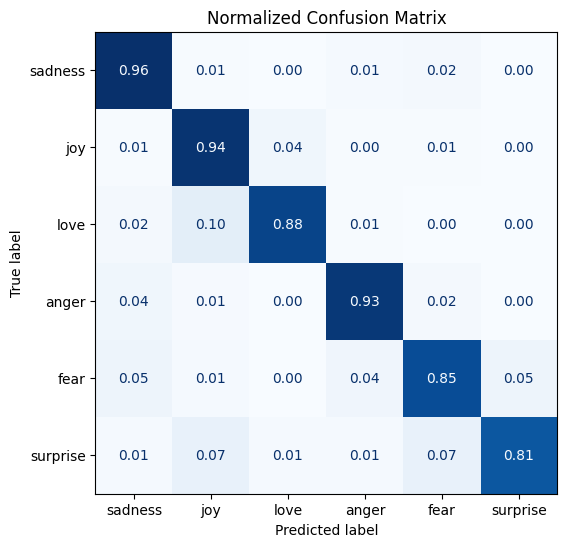

In [105]:
plot_confusion_matrix(y_preds, Y_valid, labels)

- 오류 분석

In [119]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        output = model(**inputs)
        
        pred_label = torch.argmax(output.logits, axis=1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
        
    return {
        "loss": loss.cpu().numpy(),
        "predicted_label": pred_label
    }

In [120]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])


In [121]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [122]:
print(type(emotions_encoded["train"]["text"][0]))
print(type(emotions_encoded["train"]["input_ids"][0]))


<class 'str'>
<class 'torch.Tensor'>


In [170]:

emotions_encoded["validation"]=emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [171]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [188]:
emotions_encoded.set_format("pandas")

cols = ["text", "label", "predicted_label", "loss"]


In [192]:
emotions_encoded["validation"][:]

,text,label,input_ids,attention_mask,loss,predicted_label
0,im feeling quite sad and sorry for myself but ...,0,"[101, 10047, 3110, 3243, 6517, 1998, 3374, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.024638,0
1,i feel like i am still looking at a blank canv...,0,"[101, 1045, 2514, 2066, 1045, 2572, 2145, 2559...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.024635,0
2,i feel like a faithful servant,2,"[101, 1045, 2514, 2066, 1037, 11633, 7947, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.386161,2
3,i am just feeling cranky and blue,3,"[101, 1045, 2572, 2074, 3110, 27987, 2100, 199...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",0.034077,3
4,i can have for a treat or if i am feeling festive,1,"[101, 1045, 2064, 2031, 2005, 1037, 7438, 2030...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.021362,1
...,...,...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,0,"[101, 10047, 2383, 7020, 2050, 7749, 4826, 199...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.035003,0
1996,i constantly worry about their fight against n...,1,"[101, 1045, 7887, 4737, 2055, 2037, 2954, 2114...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.022695,1
1997,i feel its important to share this info for th...,1,"[101, 1045, 2514, 2049, 2590, 2000, 3745, 2023...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.025374,1
1998,i truly feel that if you are passionate enough...,1,"[101, 1045, 5621, 2514, 2008, 2065, 2017, 2024...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.415884,1


In [193]:
df_test = emotions_encoded["validation"][:][cols]

In [194]:
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

In [196]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1509,i guess this is a memoir so it feels like that...,joy,fear,5.337458
1274,i am going to several holiday parties and i ca...,joy,sadness,5.011007
1963,i called myself pro life and voted for perry w...,joy,sadness,4.981419
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.845675
882,i feel badly about reneging on my commitment t...,love,sadness,4.790840
1111,im lazy my characters fall into categories of ...,joy,fear,4.738853
1950,i as representative of everything thats wrong ...,surprise,anger,4.728313
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.720838
465,i would eventually go in to these stores but i...,joy,fear,4.610776
1683,i had applied for a job and they had assured m...,anger,joy,4.501171


In [197]:
df_test.sort_values('loss', ascending=True).head(10)

,text,label,predicted_label,loss
1263,i feel this way about blake lively,joy,joy,0.018181
1513,i have also been getting back into my gym rout...,joy,joy,0.018681
1873,i feel practically virtuous this month i have ...,joy,joy,0.018739
578,i got to christmas feeling positive about the ...,joy,joy,0.018764
329,i have had my treasury selection on the front ...,joy,joy,0.018925
19,i had lunch with an old friend and it was nice...,joy,joy,0.019060
1205,i log on feeling vaguely sociable and after a ...,joy,joy,0.019262
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.019285
632,i feel he is an terrific really worth bet,joy,joy,0.019379
856,i feel is more energetic in urban singapore th...,joy,joy,0.019383
